## United Kingdom (UK) Traffic Analysis (2000 - 2018)

- This project gives detailed insights into United Kingdom (UK) long-term road traffic trends between 2000 - 2018 based on estimated **Annual average daily flows (AADFs) and volume of traffic (i.e. miles driven per year for each vehicle on a particular road)** for vehicle types, road networks, geographical regions, road types and highway authorities.


- The afore-mentioned insights highlighted led to questions that were answered by interactive data visualization **(with the help of Plotly)**


-- **What is Annual Average Daily Flow (AADF)?**

The average over a full year of the number of vehicles passing a point in the road network each day.


-- **What is Volume of Traffic?**

The amount of miles or kilometre a vehicle cover a day for a whole year is the Vehicle kilometre/mile, and this is referred to as the volume of traffic. For example, one vehicle travelling one kilometre or mile a day for a year would be 365 vehicle kilometres or miles. That is the volume of traffic.


It can be calculated by multiplying the AADF by the corresponding length of road and the number of days in a year.



### Questions:


1. 

   What is the evolution of traffic **(in terms of miles driven per year)** for different types of vehicles (i.e. Pedal Cycles, Motor cycles, Cars and Taxis, Buses and Coaches, Vans, All motor vehicles, Heavy Goods Vehicles and All Vehicles) in UK, based on:

      a. Different Regions of UK

      b. Major Road classes in UK

      c. Top 10 busiest roads in UK

      d. Top 10 busiest highway authorties in UK.
   
   
   
   
   
2. 


   a. What is the average volume of traffic (in terms of miles driven by all vehicles) on each Major Road Category per year (between 2000 - 2018)?
   
   b. What is the Annual Average Daily Flow (AADF i.e. Number of vehicles that traverse a particular point in a road per day) for each Region in UK, for the 10 busiest Roads and highway authorities in UK (between 2000 and 2018)?
   
   
3. 


   a. What is the traffic trend for each type of vehicle (i.e. motor vehicles, pedal cycles, heavy goods vehicles etc.,) in United Kingdom (UK) between 2000 - 2018?

   b. How many miles has each type of vehicle (i.e. motor vehicles, pedal cycles, heavy goods vehicles etc.,) in UK covered based on the major road categories between 2000 - 2018?
   
   
   
   
[Dataset Download link](https://roadtraffic.dft.gov.uk/downloads)

In [1]:
import math 
import calendar
import pandas as pd
import datetime


import geopandas as gpd
from shapely.geometry import Point
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# plotly
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.express as px

In [3]:
##TRAFFIC DATASETS ###

uk_traffic = pd.read_csv('dft_traffic_counts_aadf.csv')

In [4]:
#size of the df
uk_traffic.shape

(429055, 34)

In [5]:
#check for missing values
uk_traffic.isnull().sum()

count_point_id                      0
year                                0
region_id                           0
region_name                         0
region_ons_code                     0
local_authority_id                  0
local_authority_name                0
local_authority_code                0
road_name                           0
road_category                       0
road_type                           0
start_junction_road_name        89095
end_junction_road_name          89088
easting                             0
northing                            0
latitude                            0
longitude                           0
link_length_km                  70622
link_length_miles               70622
estimation_method                   0
estimation_method_detailed          0
pedal_cycles                        0
two_wheeled_motor_vehicles          0
cars_and_taxis                      0
buses_and_coaches                   0
lgvs                                0
hgvs_2_rigid

In [6]:
##lets drop the two columns with the most missing values
uk_traffic = uk_traffic.drop(['start_junction_road_name', 'end_junction_road_name'], axis=1)

In [7]:
uk_traffic.dropna(inplace = True)

In [8]:
uk_traffic.head()

,count_point_id,year,region_id,region_name,region_ons_code,local_authority_id,local_authority_name,local_authority_code,road_name,road_category,...,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_4_or_more_rigid_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
0,51,2000,1,South West,E12000009,1,Isles of Scilly,E06000053,A3111,PA,...,25,451,30,0,0,0,0,0,30,1430
1,52,2000,1,South West,E12000009,1,Isles of Scilly,E06000053,A3112,PA,...,16,250,11,0,0,0,0,0,11,1140
2,53,2000,1,South West,E12000009,1,Isles of Scilly,E06000053,A3111,PA,...,16,264,15,0,0,0,0,0,15,884
3,54,2000,1,South West,E12000009,1,Isles of Scilly,E06000053,A3110,PA,...,15,214,14,0,0,0,0,0,14,774
4,55,2000,1,South West,E12000009,1,Isles of Scilly,E06000053,A3110,PA,...,22,77,27,0,0,0,0,0,27,557


In [9]:
uk_traffic['AllVehicles'] = uk_traffic['all_hgvs'] + uk_traffic['all_motor_vehicles'] + uk_traffic['pedal_cycles']

In [10]:
###calculate miles driven, the miles driven per year by a vehicle == Volume of traffic for that particular vehicle on a road

vehicles = ['pedal_cycles', 'two_wheeled_motor_vehicles', 'cars_and_taxis', 'buses_and_coaches', 'lgvs', 
            'hgvs_2_rigid_axle', 'hgvs_3_rigid_axle', 
            'hgvs_3_or_4_articulated_axle', 'hgvs_4_or_more_rigid_axle', 
            'hgvs_5_articulated_axle', 'hgvs_6_articulated_axle', 'all_hgvs', 'all_motor_vehicles', 'AllVehicles']

In [11]:
for vehicle in vehicles:
    uk_traffic[vehicle + 'miles_driven'] = uk_traffic[vehicle] * uk_traffic['link_length_miles'] * 365

In [12]:
uk_traffic['road_category'].value_counts()

PA     275657
TA      43545
TM      20298
MCU     13752
MB       4458
PM        723
Name: road_category, dtype: int64

In [18]:
###Note

##the AADF values for MB and MCU are Zero, this means they are NOT USEFUL for our traffic analyses

## This means will drop the both of them

In [13]:
uk_traffic = uk_traffic[(uk_traffic['road_category'] != 'MCU') & (uk_traffic['road_category'] != 'MB')]

In [14]:
uk_traffic['road_type'].value_counts()

major    340223
Name: road_type, dtype: int64

In [15]:
rd_category = uk_traffic.road_category.unique().tolist()
print(rd_category)

['PA', 'TM', 'TA', 'PM']


In [16]:
road_category_description = ['Class A Principal Road', 'M or Class A Trunk Motorway', 'Class A Trunk Road', 
                             'M or Class A Principal Motorway']

In [17]:
for road in range(len(rd_category)):
    uk_traffic.loc[uk_traffic['road_category'] == rd_category[road], 'road_category'] = road_category_description[road]

In [18]:
uk_traffic['northing'].max()

2187789

In [19]:
uk_traffic.shape

(340223, 47)

In [20]:
uk_traffic = uk_traffic.loc[uk_traffic['northing']!=uk_traffic['northing'].max()]

### First, Lets start with plotting the locations where the AADF measurement


In [21]:
uk_gpd = uk_traffic.copy()

In [22]:
#uk 2018 road network map
gb_shape = gpd.read_file('./uk_shape_file/2018-MRDB-minimal.shp')

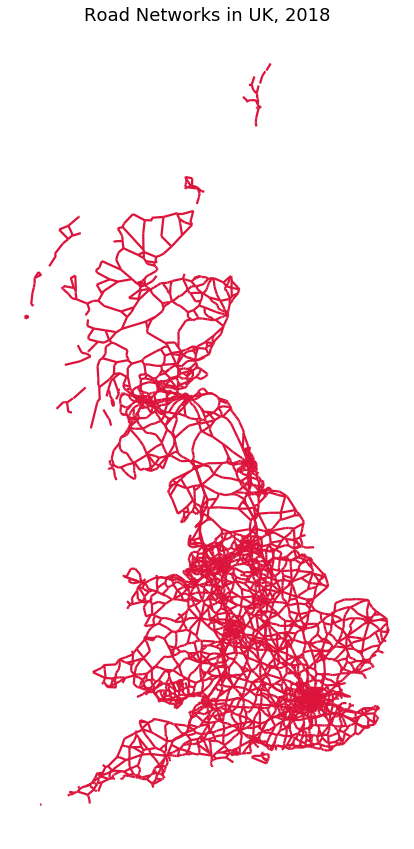

In [23]:
sns.set_context('talk')
ax = gb_shape.plot(figsize=(25,15), color='crimson')
ax.set(title='Road Networks in UK, 2018')
ax.set_axis_off()

In [24]:
#convert the uk_traffic (uk_gpd) df to GeopandasDf
points = uk_gpd.apply(lambda row: Point(row.easting, row.northing), axis=1)
uk_gpd = gpd.GeoDataFrame(uk_gpd, geometry=points)

Text(0.5, 1, 'Road Networks (points) where AADF measurement were taken between 2000 - 2018 in UK')

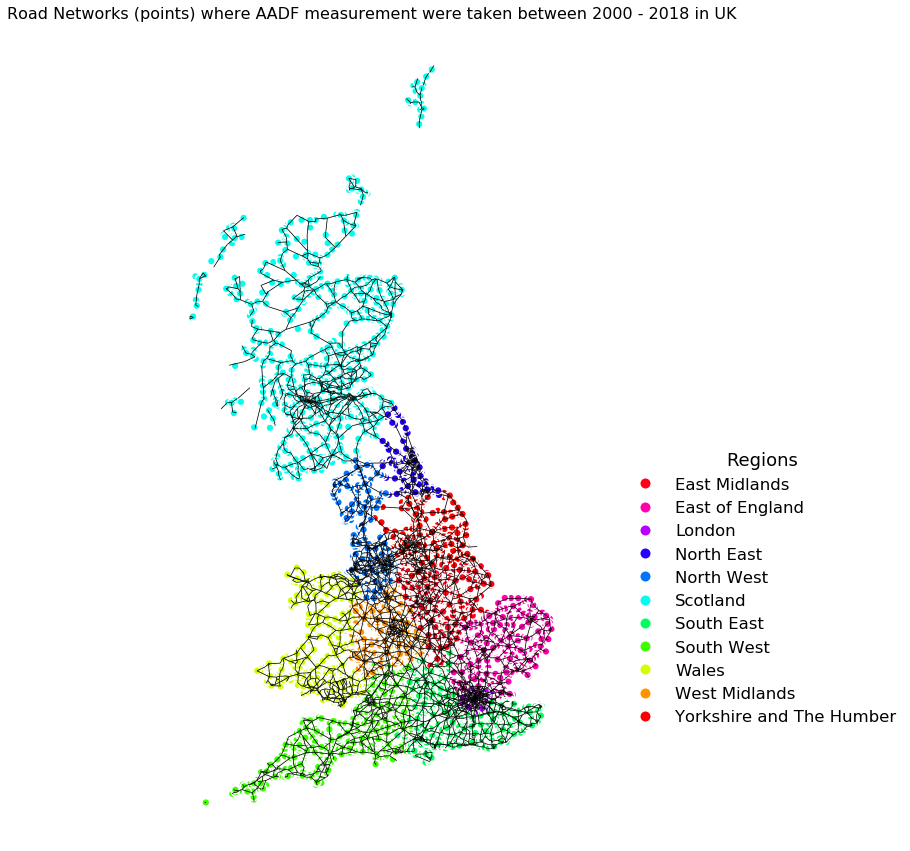

In [25]:
#lets plot points where AADF were measured based on UK regions
ax = gb_shape.plot(figsize=(30,15), color='black', linewidth=0.75)
uk_gpd.plot(column='region_name', ax=ax, markersize=60, legend = True, cmap='hsv_r', edgecolor='white')
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.1,0.5))
leg.set_title('Regions')
leg.set_frame_on(False)
ax.set_axis_off()
ax.set_title('Road Networks (points) where AADF measurement were taken between 2000 - 2018 in UK', fontsize=16, pad=10)

1. What is the evolution of traffic (in terms of miles driven per year) for different types of vehicles ***(i.e. Pedal Cycles, Motor cycles, Cars and Taxis, Buses and Coaches, Vans, All motor vehicles, Heavy Goods Vehicles and All Vehicles)*** in UK, based on:

**a. Different Regions of UK**


**b. Major Road classes in UK**


**c. Top 10 busiest roads in UK**


**d. Top 10 busiest highway authorties in UK**


--

In [21]:
####To start with let extract top 10 busiest roads
##sort starting with the busiest road based on its average vehicle mile per year

rd_agg = uk_traffic.groupby(['year', 
                             'road_name']).AllVehiclesmiles_driven.agg(['count', 
                                                                        'sum', 'mean']).sort_values(by = 'mean', ascending = False)
rd_agg.reset_index(inplace = True)

In [22]:
rd_agg_100 = rd_agg[:100].copy()

In [23]:
#take just the first 10 roads
print(rd_agg_100['road_name'].unique().tolist())

['A1(M)', 'M25', 'A1(T)', 'M26', 'M5', 'M1', 'M40', 'M3', 'M6', 'M23', 'M11']


In [24]:
#extract top 10 busiest Highway authority based on average vehicle mile per year

rd_agg = uk_traffic.groupby(['year', 'local_authority_name']).AllVehiclesmiles_driven.agg(['count', 'sum', 'mean']).sort_values(by = 'sum', ascending = False)
rd_agg.reset_index(inplace = True)

In [25]:
rd_agg_100 = rd_agg[:140].copy()
#take just the first 10 highway authority
print(rd_agg_100['local_authority_name'].unique().tolist())

['Kent', 'Hampshire', 'Surrey', 'Essex', 'Hertfordshire', 'Lancashire', 'Staffordshire', 'Warwickshire', 'Northamptonshire', 'Cheshire']


In [26]:
##### EXTRACT VEHICLE TRAFFIC FLOW  BASED ON DIFFERENT CRITERIAS WRITTEN ABOVE #####
#### NOTE: The Traffic flow / trends are based on the volume of traffic i.e. miles driven by each vehicle per year ####

def vehicles_traffic_flow(df, vehicle, column):
    
    if column == 'road_name':
        loc_agg = uk_traffic.groupby(['year', column])[vehicle].agg(['count', 'sum', 'mean']).reset_index()
        loc_names = ['A1(M)', 'M25', 'A1(T)', 'M26', 'M5', 'M1', 'M40', 'M3', 'M6', 'M23']
    elif column == 'local_authority_name':
        loc_agg = uk_traffic.groupby(['year', column])[vehicle].agg(['count', 'sum', 'mean']).reset_index()
        loc_names = ['Kent', 'Hampshire', 'Surrey', 'Essex', 'Hertfordshire', 
                     'Lancashire', 'Staffordshire', 'Warwickshire', 'Northamptonshire', 'Cheshire']
    else:
        loc_agg = df.groupby(['year', column])[vehicle].agg(['count', 'sum', 'mean']).reset_index()
        loc_names = loc_agg[column].unique().tolist()
        
    list_traces = []
    colors = ['lightslategray', 'crimson', 'darkcyan', 'darkgoldenrod', 'cornsilk', 'turquoise', 'limegreen', \
              'darkorchid', 'palevioletred', 'forestgreen', 'silver', 'lightsteelblue']
    for name in range(len(loc_names)):
        name_agg = loc_agg[loc_agg[column] == loc_names[name]]
        data_agg = go.Scatter(x = name_agg['year'], y= name_agg['mean'], mode="lines+markers", name= loc_names[name], 
                              line= dict(color = colors[name], width=2.5))
        
        list_traces.append(data_agg)
    if column == 'road_category':
        context = 'on Major Road Classes in UK'
    elif column == 'region_name':
        context = 'in UK Regions'
    elif column == 'road_name':
        context = 'on the 10 Busiest Roads in UK'
    elif column == 'local_authority_name':
        context = 'on the 10 Busiest Highway Authorities in UK'
    
    if vehicle == 'pedal_cyclesmiles_driven':
        content = 'Pedal Cycles'
    elif vehicle == 'all_motor_vehiclesmiles_driven':
        content = 'Motor Vehicles'
    elif vehicle == 'all_hgvsmiles_driven':
        content = 'Heavy Goods Vehicles (Lorries)'
    elif vehicle == 'cars_and_taxismiles_driven':
        content = 'Cars and Taxis'
    elif vehicle == 'two_wheeled_motor_vehiclesmiles_driven':
        content = 'Motor Cycles'
    elif vehicle == 'buses_and_coachesmiles_driven':
        content = 'Buses and Coaches'
    elif vehicle == 'AllVehiclesmiles_driven':
        content = 'All vehicles'
    elif vehicle == 'lgvsmiles_driven':
        content = 'Vans'
    
        
    layout = go.Layout(title='<b> '+ content +' traffic trends ' + context + ', 2000 - 2018 <b>', width=1000, 
                       height=600, xaxis=dict(title='<b> Year <b>',titlefont=dict(size=16, color='#7f7f7f'), tickfont=dict(size=15, color='darkslateblue')), 
                       yaxis=dict(title='<b> Miles Driven per Year <b>',titlefont=dict(size=16,color='#7f7f7f'), tickfont=dict(size=15, color='darkslateblue')))
    fig = go.Figure(data=list_traces, layout = layout)
    fig.update_xaxes(dtick=2)
    iplot(fig)

### a. Vehicles traffic flow / trend based on different regions in UK, from 2000 - 2018

In [27]:
### All Vehicles --- UK Regions###
vehicles_traffic_flow(uk_traffic, 'AllVehiclesmiles_driven', 'region_name')

In [28]:
### All heavy good vehicles --- UK Regions###
vehicles_traffic_flow(uk_traffic, 'all_hgvsmiles_driven', 'region_name')

In [29]:
### All motor vehicles vehicles --- UK Regions###
vehicles_traffic_flow(uk_traffic, 'all_motor_vehiclesmiles_driven', 'region_name')

In [30]:
### Cars and Taxis --- UK Regions###
vehicles_traffic_flow(uk_traffic, 'cars_and_taxismiles_driven', 'region_name')

In [31]:
### Motor Cycles --- UK Regions###
vehicles_traffic_flow(uk_traffic, 'two_wheeled_motor_vehiclesmiles_driven', 'region_name')

In [32]:
### Pedal Cycles --- UK Regions###
vehicles_traffic_flow(uk_traffic, 'pedal_cyclesmiles_driven', 'region_name')

In [33]:
### Vans --- UK Regions###
vehicles_traffic_flow(uk_traffic, 'lgvsmiles_driven', 'region_name')

In [34]:
### Buses and Coaches --- UK Regions###
vehicles_traffic_flow(uk_traffic, 'buses_and_coachesmiles_driven', 'region_name')

**Major Observations:** 

- Miles driven by all vehicles in different UK Regions have been growing slightly since 2000 till 2018, 
- Heavy Goods and Motor Vehicles (Cars & Taxis) have also been growing slightly from 2000 -2018.
- Miles driven by Motor Cycles, Buses and Coaches show some flunctuating trends; Motor cycles, Buses and Coaches are more driven in London than any other regions. 
- Buses and Coaches show steady decline from 2015 - 2018 in all regions except London, where it has been flunctuating but still a little bit stable.
- Pedal Cycles is most common in London, and have been showing steady growth, even though some flunctuations can be observed.
- Miles driven by Light Vans also have been steadily growing in all UK Regions.

### b. Vehicles traffic flow / trend on Major Road Classes in UK, from 2000 - 2018

In [35]:
### All Vehicles --- Major Road Classes###
vehicles_traffic_flow(uk_traffic, 'AllVehiclesmiles_driven', 'road_category')

In [36]:
### All Motor Vehicles --- Major Road Classes###
vehicles_traffic_flow(uk_traffic, 'all_motor_vehiclesmiles_driven', 'road_category')

In [37]:
### Heavy Goods Vehicles --- Major Road Classes###
vehicles_traffic_flow(uk_traffic, 'all_hgvsmiles_driven', 'road_category')

In [38]:
### Cars and Taxis --- Major Road Classes###
vehicles_traffic_flow(uk_traffic, 'cars_and_taxismiles_driven', 'road_category')

In [39]:
### Motor Cycles --- Major Road Classes###
vehicles_traffic_flow(uk_traffic, 'two_wheeled_motor_vehiclesmiles_driven', 'road_category')

In [40]:
### Pedal Cycles --- Major Road Classes###
vehicles_traffic_flow(uk_traffic, 'pedal_cyclesmiles_driven', 'road_category')

In [41]:
### Vans --- Major Road Classes###
vehicles_traffic_flow(uk_traffic, 'lgvsmiles_driven', 'road_category')

In [42]:
### Buses and Coaches --- Major Road Classes###
vehicles_traffic_flow(uk_traffic, 'buses_and_coachesmiles_driven', 'road_category')

**Major Observations:**


- Class M or A Trunk Motorway is the most busiest road class/category in UK between 2000 - 2018.
- Miles driven by all Vehicles, Motor Vehicles, Heavy Goods Vehicles, Cars and Taxis are broadly stable between 2000 - 2018.
- Motor Cycles is most commonly driven on Class A or M Trunk Motorway and it shows a steady decline on this road class, while for other road classes is broadly stable with some flunctuations esp. on Class A trunk Road.
- Pedal Cycle is commonly driven on Class A roads and it shows steady increase on Principal road since 2012, but has been considerably stable on Trunk Road with some flunctuations.
- Miles driven by Light Vans shows steady growth on all Road Classes.
- Buses and Coaches show steady decline on Class M or A Trunk Motorway, and for other road classes it has been broadly stable.

### c. Vehicles traffic flow / trend on the 10 busiest roads in UK, from 2000 - 2018

In [43]:
### All Vehicles --- 10 busiest roads###
vehicles_traffic_flow(uk_traffic, 'AllVehiclesmiles_driven', 'road_name')

In [44]:
### All Motor Vehicles --- 10 busiest roads###
vehicles_traffic_flow(uk_traffic, 'all_motor_vehiclesmiles_driven', 'road_name')

In [45]:
### Cars and Taxis --- 10 busiest roads###
vehicles_traffic_flow(uk_traffic, 'cars_and_taxismiles_driven', 'road_name')

In [46]:
### Vans --- 10 busiest roads###
vehicles_traffic_flow(uk_traffic, 'lgvsmiles_driven', 'road_name')

In [47]:
### Motor Cycles --- 10 busiest roads###
vehicles_traffic_flow(uk_traffic, 'two_wheeled_motor_vehiclesmiles_driven', 'road_name')

In [48]:
### Heavy Good Vehicles --- 10 busiest roads###
vehicles_traffic_flow(uk_traffic, 'all_hgvsmiles_driven', 'road_name')

**Major Observations:**

- A1(M) was the busiest road between 2002 - 2005 in UK, but dropped drastically from 2006 onwards 
- A1(T) existed in UK between 2006 - 2011.
- Miles driven by all vehicles, motor vehicles, cars and taxis and heay goods vehicles on the busiest roads have been broadly stable except for A1(M) that showed an abrupt drop in 2005.
- Light Vans have been showing steady increase across the busiest roads except for A1(M) that has been steady declining in terms of miles driven by vehicles.
- Miles driven by Motor Cycles have been steadily declining across all the top 10 busiest roads.

### d. Vehicles traffic flow / trend based on 10 busiest Highway Authorities in UK, from 2000 - 2018

In [49]:
### All Vehicles --- 10 busiest roads###
vehicles_traffic_flow(uk_traffic, 'AllVehiclesmiles_driven', 'local_authority_name')

In [50]:
### Heavy Goods Vehicles --- 10 busiest roads###
vehicles_traffic_flow(uk_traffic, 'all_hgvsmiles_driven', 'local_authority_name')

In [51]:
### Motor Vehicles --- 10 busiest roads###
vehicles_traffic_flow(uk_traffic, 'all_motor_vehiclesmiles_driven', 'local_authority_name')

In [52]:
### Cars and Taxis --- 10 busiest roads###
vehicles_traffic_flow(uk_traffic, 'cars_and_taxismiles_driven', 'local_authority_name')

In [53]:
### Vans --- 10 busiest roads###
vehicles_traffic_flow(uk_traffic, 'lgvsmiles_driven', 'local_authority_name')

In [54]:
### Pedal Cycles --- 10 busiest roads###
vehicles_traffic_flow(uk_traffic, 'pedal_cyclesmiles_driven', 'local_authority_name')

In [55]:
### Motor Cycles --- 10 busiest roads###
vehicles_traffic_flow(uk_traffic, 'two_wheeled_motor_vehiclesmiles_driven', 'local_authority_name')

**Major Observations:**

- Cheshire highway authority existed between 2000 - 2008.
- Miles driven by all vehicles, motor vehicles, heavy goods vehicles, cars and taxis have been growing slightly and steadily with little flunctuations.
- Light vans shows steady growth across all the top 10 highways authorities.
- Miles driven by pedal cycles have been showing flunctuating growth with a major drop in years 2005 and 2008. 
- Miles driven by motor cycles shows steady decline across all highway authorities.

**2a. What is the average volume of traffic (in terms of miles driven by all vehicles) on each Major Road Category per year (between 2000 - 2018)?**




**2b. What is the Annual Average Daily Flow (AADF i.e.** ***Number of vehicles that traverse a particular point in a road per day***) **for each Region in UK, for the 10 busiest Roads and highway authorities in UK (between 2000 and 2018)?**

In [56]:
#### CALCULATE AVERAGE VOLUME OF TRAFFIC FOR EACH MAJOR ROAD CATEGORY ####
#### AND CALCULATE AADF FOR EACH REGION IN UK; FOR 10 BUSIEST ROADS AND HIGHWAYS ####

def average_volume_traffic_aadf(df, column, color_scale):
    
    if column == 'road_name':
        vol_agg = df.groupby(['year', \
                              column])['AllVehicles'].agg(['count', 'sum', 'mean']).sort_values(by = 'mean', ascending = False).reset_index()
        vol_agg = vol_agg[:130].copy()
        vol_agg.sort_values(by = 'mean', ascending = True, inplace = True)
    elif column == 'local_authority_name':
        vol_agg = df.groupby(['year', \
                              column])['AllVehicles'].agg(['count', 'sum', 'mean']).sort_values(by = 'sum', ascending = False).reset_index()
        vol_agg = vol_agg[:130].copy()
        vol_agg.sort_values(by = 'mean', ascending = True, inplace = True)
    elif column == 'road_category':
        vol_agg = df.groupby(['year', \
                              column])['AllVehiclesmiles_driven'].agg(['count', 'sum', 'mean']).sort_values(by = 'mean').reset_index()
    
    elif column == 'region_name':
        vol_agg = df.groupby(['year', \
                              column])['AllVehicles'].agg(['count', 'sum', 'mean']).sort_values(by = 'mean').reset_index()
    
    
    #Data Visualization
    
    fig = px.bar(vol_agg, x= 'mean', y= column, color='year', barmode = 'group', orientation = 'h', 
                 labels={'year':'<b> Years <b>'}, width=1000, height=700, 
                 color_continuous_scale= color_scale)
    
    if column == 'road_category':
        content = 'Average Volume of Traffic for each Road Category in UK'
        context = 'Road Category'
        x_value = 'Volume of Traffic (Vehicle Miles for each year are stacked on top of each other)'
    elif column == 'region_name':
        content = 'Average number of Vehicles that traverse (all roads in) UK Regions per day'
        context = 'Regions'
        x_value = 'Annual Average Daily Flow (AADF for each year are stacked on top of eachother)'
    elif column == 'road_name':
        content = 'Average number of Vehicles that traverse 10 busiest roads in UK per day'
        context = 'Roads'
        x_value = 'Annual Average Daily Flow (AADF for each year are stacked on top of eachother)'
    elif column == 'local_authority_name':
        content = 'Average number of Vehicles that traverse 10 busiest Highway Authorities in UK per day'
        context = 'Highway Authority'
        x_value = 'Annual Average Daily Flow (AADF for each year are stacked on top of eachother)'
        
        
    fig.update_layout(title='<b> ' + content + ', 2000 - 2018 <b>', 
                      xaxis=dict(title='<b> ' + x_value + ' <b>',titlefont=dict(size=16, color='#7f7f7f'), tickfont=dict(size=15, color='darkslateblue')), 
                      yaxis=dict(title='<b> ' + context + ' <b>',titlefont=dict(size=16,color='#7f7f7f'), tickfont=dict(size=15, color='darkslateblue'))) 
    
    
    iplot(fig)

In [57]:
#plot average volume of traffic for each year --> Major Road Category

average_volume_traffic_aadf(uk_traffic, 'road_category', px.colors.sequential.Plasma)

**Obsevations:**

- Volume of traffics for each year are stacked on each other for each road category
- M or Class A Trunk Motorway is the busiest major road category in UK, 2000 - 2018.
- Class A Principal Road is the least busiest road category in UK, between 2000 - 2018.

In [58]:
#plot AADF yearly for each Region in UK

average_volume_traffic_aadf(uk_traffic, 'region_name', px.colors.diverging.Earth)

**Observations:**

- Annual Average Daily Flow (AADF) for each year is stacked on top of each other for each Region in UK.
- London is the most busiest region in UK in terms of volume of traffic.
- Scotland has the least volume of traffic in UK.

In [59]:
#plot AADF yearly for 10 busiest roads in UK

average_volume_traffic_aadf(uk_traffic, 'road_name', px.colors.sequential.Agsunset)

**Observations:**

- Annual Average Daily Flow (AADF) for each year are stacked on top each other.
- M25 is the busiest road in UK based on the Annual Average Daily Flow (AADF).

In [60]:
#plot AADF yearly for 10 busiest highway authority in UK

average_volume_traffic_aadf(uk_traffic, 'local_authority_name', px.colors.cyclical.Twilight)

**Observations:**

- Annual Average Daily Flow for each year is stacked on top of each other for each Highway Authority.
- Hertfordshire is the busiest highway authority in UK between 2000 - 2018.

**3a. What is the traffic trend for each type of vehicle (i.e. motor vehicles, pedal cycles, heavy goods vehicles etc.,) in United Kingdom (UK) between 2000 - 2018?**


**3b. How many miles has each type of vehicle (i.e. motor vehicles, pedal cycles, heavy goods vehicles etc.,) in UK covered based on the major road categories between 2000 - 2018?**

In [61]:
### VEHICLE TRAFFIC TRENDS AND MILES COVERED BY EACH VEHICLES BETWEEN 2000 AND 2018 ###

def vehicle_trends(df, vehicle, column, color):
    
    veh_agg = df.groupby(['road_category'])[vehicle].agg(['count', 'sum', 'mean']).reset_index()
    vehyr_agg = df.groupby(['year'])[vehicle].agg(['count', 'sum', 'mean']).reset_index()
    ##average growth rate
    average_growth_rate = np.power(((vehyr_agg.loc[vehyr_agg.shape[0]-1, 'sum']) \
                                    / vehyr_agg.loc[0, 'sum']), 1/vehyr_agg.shape[0]) - 1
    
    avg_rate = round(average_growth_rate * 100, 2)
    avg_value = vehyr_agg['mean'].min()
    
    def line_plot(df, column, avg_rate, avg_value):
        
        if (column == 'Heavy Goods Vehicle') or (column == 'Buses and Coaches') or (column == 'Motor Cycles'):
            y_value = 1.1
        else:
            y_value = 0.8
        
        annotations = []
        fig = go.Figure()
        fig.add_trace(go.Scatter(x = df['year'], y= df['mean'], mode="lines", name= column + ' trend', 
                                 line= dict(color = 'rgb(67,67,67)', width=2.5)))
        
        annotations.append(dict(xref='paper', yref='paper', x=0.35, y=y_value, 
                                              xanchor='center', yanchor='top', 
                                              text= '<b>' + column + ' traffic trend in UK from 2000 - 2018 <b>', 
                                              font=dict(family='Arial', 
                                                        size=16, color='darkslategray'), 
                                              showarrow=False))
        annotations.append(dict(xref='paper', x=0.25, y=avg_value,
                                  xanchor='left', yanchor='middle',
                                  text='Average annual growth rate {}%'.format(avg_rate),
                                  font=dict(family='Arial',
                                            size=15),
                                  showarrow=False))
        
        fig.update_layout(xaxis=dict(title='<b> Year <b>',titlefont=dict(size=14, color='#7f7f7f'), 
                                     showline=True, showgrid=False, showticklabels=True, linecolor='rgb(204, 204, 204)', linewidth=2, 
                                     ticks='outside', tickfont=dict(family='Arial', size=14, color='rgb(82, 82, 82)')), 
                          yaxis=dict(title='<b> Miles Driven per year <b>',titlefont=dict(size=14,color='#7f7f7f'), 
                                     showgrid=False, zeroline=False, showline=True, showticklabels=True, 
                                     tickfont=dict(family='Arial', size=14, color='rgb(82, 82, 82)')), 
                          autosize=False, margin=dict(autoexpand=False, l=100, r=20, t=110), plot_bgcolor='white', 
                         annotations = annotations)
        
        fig.show()
        
        
    def pie_plot(df, column, color):
        
        vehicle_labels = df.road_category.unique().tolist()
        vehicle_values = df['sum'].values.tolist()
        vehicle_sum = int(sum(vehicle_values))
        def roundup(x):
            if len(str(x)) >= 13:
                num = str(int(math.ceil(x / 1000000000000.0)))
                num = num + ' Trillion'
            else:
                num = str(int(math.ceil(x / 1000000000.0)))
                num = num + ' Billion'
            return num
        vehicle_sum = roundup(vehicle_sum)
        
        fig = go.Figure()
        
        fig.add_trace(go.Pie(labels= vehicle_labels, values= vehicle_values, name="", 
                             hole=.7, textinfo='label+percent', insidetextorientation='radial', marker_colors= color))
        
        fig.update_layout(title_text="<b> " + column + " miles covered <b>", 
                          annotations=[dict(text= vehicle_sum + ' miles covered', x=0.5, y=0.5, font_size=18, showarrow=False)])
        
        fig.show()
        
    line_plot(vehyr_agg, column, avg_rate, avg_value)
    pie_plot(veh_agg, column, color)

In [62]:
# Define color sets of paintings -- Plotly selections
night_colors = ['rgb(56, 75, 126)', 'rgb(18, 36, 37)', 'rgb(34, 53, 101)',
                'rgb(36, 55, 57)', 'rgb(6, 4, 4)']
sunflowers_colors = ['rgb(177, 127, 38)', 'rgb(205, 152, 36)', 'rgb(99, 79, 37)',
                     'rgb(129, 180, 179)', 'rgb(124, 103, 37)']
irises_colors = ['rgb(33, 75, 99)', 'rgb(79, 129, 102)', 'rgb(151, 179, 100)',
                 'rgb(175, 49, 35)', 'rgb(36, 73, 147)']
cafe_colors =  ['rgb(146, 123, 21)', 'rgb(177, 180, 34)', 'rgb(206, 206, 40)',
                'rgb(175, 51, 21)', 'rgb(35, 36, 21)']
random_colors = ['rgb(67,67,67)', 'rgb(115,115,115)', 'rgb(49,130,189)', 'rgb(189,189,189)']

In [63]:
# motor vehicle traffic trend and miles covered btw 2000 - 2018

vehicle_trends(uk_traffic, 'all_motor_vehiclesmiles_driven', 'Motor Vehicles', irises_colors)

In [64]:
# All vehicles traffic trend and miles covered btw 2000 - 2018

vehicle_trends(uk_traffic, 'AllVehiclesmiles_driven', 'All Vehicles', cafe_colors)

In [65]:
# heavy goods vehicles traffic trend and miles covered btw 2000 - 2018

vehicle_trends(uk_traffic, 'all_hgvsmiles_driven', 'Heavy Goods Vehicle', night_colors)

In [66]:
# heavy goods vehicles traffic trend and miles covered btw 2000 - 2018

vehicle_trends(uk_traffic, 'cars_and_taxismiles_driven', 'Cars and Taxis', sunflowers_colors)

In [67]:
# pedal cycles traffic trend and miles covered btw 2000 - 2018

vehicle_trends(uk_traffic, 'pedal_cyclesmiles_driven', 'Pedal Cycles', irises_colors)

In [68]:
# Buses and Coaches vehicles traffic trend and miles covered btw 2000 - 2018

vehicle_trends(uk_traffic, 'buses_and_coachesmiles_driven', 'Buses and Coaches', random_colors)

In [69]:
# Vans traffic trend and miles covered btw 2000 - 2018

vehicle_trends(uk_traffic, 'lgvsmiles_driven', 'Vans', irises_colors)

In [70]:
# Motor Cycles traffic trend and miles covered btw 2000 - 2018

vehicle_trends(uk_traffic, 'two_wheeled_motor_vehicles', 'Motor Cycles', cafe_colors)

In [72]:
uk_traffic.columns

Index(['count_point_id', 'year', 'region_id', 'region_name', 'region_ons_code',
       'local_authority_id', 'local_authority_name', 'local_authority_code',
       'road_name', 'road_category', 'road_type', 'easting', 'northing',
       'latitude', 'longitude', 'link_length_km', 'link_length_miles',
       'estimation_method', 'estimation_method_detailed', 'pedal_cycles',
       'two_wheeled_motor_vehicles', 'cars_and_taxis', 'buses_and_coaches',
       'lgvs', 'hgvs_2_rigid_axle', 'hgvs_3_rigid_axle',
       'hgvs_3_or_4_articulated_axle', 'hgvs_4_or_more_rigid_axle',
       'hgvs_5_articulated_axle', 'hgvs_6_articulated_axle', 'all_hgvs',
       'all_motor_vehicles', 'AllVehicles', 'pedal_cyclesmiles_driven',
       'two_wheeled_motor_vehiclesmiles_driven', 'cars_and_taxismiles_driven',
       'buses_and_coachesmiles_driven', 'lgvsmiles_driven',
       'hgvs_2_rigid_axlemiles_driven', 'hgvs_3_rigid_axlemiles_driven',
       'hgvs_3_or_4_articulated_axlemiles_driven',
       'hgvs_4_o

In [73]:
def growth_rate(df, vehicle):
    
    vehyr_agg = df.groupby(['year'])[vehicle].agg(['count', 'sum', 'mean']).reset_index()
    
    #growth rate at the end of 2018
    growth_rate_18 = round(((vehyr_agg.loc[vehyr_agg.shape[0]-1, 'sum'] \
                             - vehyr_agg.loc[0, 'sum']) / vehyr_agg.loc[0, 'sum']) * 100, 2)
    
    #calculating growth rate over regular time period
    #Average annual growth rate btw 2000 - 2018
    average_growth_rate = np.power(((vehyr_agg.loc[vehyr_agg.shape[0]-1, 'sum']) \
                                    / vehyr_agg.loc[0, 'sum']), 1/vehyr_agg.shape[0]) - 1
    
    avg_rate = round(average_growth_rate * 100, 2)
    
    #print
    print('Growth rate at the end of 2018:', str(growth_rate_18) + '%')
    print('Average annual growth rate between 2000 - 2018:', str(avg_rate) + '%')
    
    return growth_rate_18, avg_rate

In [74]:
##motor vehicle growth rate
motor_growth_rate, motor_avg_rate = growth_rate(uk_traffic, 'all_motor_vehiclesmiles_driven')

Growth rate at the end of 2018: 17.04%
Average annual growth rate between 2000 - 2018: 0.83%


In [75]:
##heavy goods vehicle growth rate
hvg_growth_rate, hvg_avg_rate = growth_rate(uk_traffic, 'all_hgvsmiles_driven')

Growth rate at the end of 2018: 3.49%
Average annual growth rate between 2000 - 2018: 0.18%


In [76]:
##pedal cycles growth rate
pc_growth_rate, pc_avg_rate = growth_rate(uk_traffic, 'pedal_cyclesmiles_driven')

Growth rate at the end of 2018: 35.19%
Average annual growth rate between 2000 - 2018: 1.6%


In [77]:
##motor cycles growth rate
mc_growth_rate, mc_avg_rate = growth_rate(uk_traffic, 'two_wheeled_motor_vehiclesmiles_driven')

Growth rate at the end of 2018: -6.82%
Average annual growth rate between 2000 - 2018: -0.37%


In [78]:
##buses and coaches growth rate
bus_growth_rate, bus_avg_rate = growth_rate(uk_traffic, 'buses_and_coachesmiles_driven')

Growth rate at the end of 2018: -21.5%
Average annual growth rate between 2000 - 2018: -1.27%


In [79]:
##Light vans growth rate
vans_growth_rate, vans_avg_rate = growth_rate(uk_traffic, 'lgvsmiles_driven')

Growth rate at the end of 2018: 66.22%
Average annual growth rate between 2000 - 2018: 2.71%


In [80]:
##cars and taxis growth rate
cars_growth_rate, cars_avg_rate = growth_rate(uk_traffic, 'cars_and_taxismiles_driven')

Growth rate at the end of 2018: 12.53%
Average annual growth rate between 2000 - 2018: 0.62%


**Observations**


- Light vans is growing at a faster rate than any type of vehicle in UK, with a staggaering growth of 66.22% at the end of year 2018, and an annual average growth rate of 2.71% -- the highest among all the vehicles.

- On the flip side, buses, coaches and motor cycles are declining their growth rate in UK, with them having a negative growth rate at the end of 2018 and also a negative annual growth rate.

- pedal cycles, cars and taxis, motor vehicles and heavy goods vehicles all have increasing growth rate from 2000 - 2018.